<a href="https://colab.research.google.com/github/PaulaBergamasco/MetoriaBCI/blob/main/Mentoria_Curado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn 
from pandas._libs.tslibs.timestamps import Timestamp
from datetime import datetime
import numpy as np
import scipy
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/DataFrame_curado.csv')

In [ ]:
df.shape

(226399, 7)

El dataset filtrado esta compuesto por 7 registros que corresponden a cuatro pacientes distintos (3 registros para el paciente AA, uno para el HA, dos para el JA y uno para el MA), los cuales fueron unificados en único dataframe, que consta de 7 columnas (ya que se ha adicionado una columna de referencia al sujeto, y una columna de secuencia temporal, y se han eliminado las columnas no relevantes) y 248983 filas ya que se han curado previamente los datos.

No todas las columnas son relevantes para el analisis, por lo que se decidió seleccionar aquellas columnas que van a ser utilizadas para tal fin, las cuales incluye las columnas: 'SampleIndex', 'Canal 1', 'Canal 2', 'Canal 3', 'Canal 4' y 'Stimulus', y el resto fueron descartadas. La información que nos brindan estas columnas  es:


1.   SampleIndex: Es el índice de las muestras.
2.   Canal 1, 2, 3 y 4: Son las señales captadas por cada canal, las cuales estan expresadas en microvoltios.
1.   Stimulus: Son las etiquetas que corresponden a cada estímulo:
>*   **99**: NaN (default value).
>*   **1**:looking left.
>*   **2**:looking right.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226399 entries, 0 to 226398
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Canal1    226399 non-null  float64
 1   Canal2    226399 non-null  float64
 2   Canal3    226399 non-null  float64
 3   Canal4    226399 non-null  float64
 4   Stimulus  226399 non-null  int64  
 5   Fuente    226399 non-null  object 
 6   STime     226399 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 12.1+ MB


In [ ]:
df['Stimulus'].unique()

array([2, 1])

In [ ]:
df['Stimulus'].value_counts()

2    115400
1    110999
Name: Stimulus, dtype: int64

Los valores que puede tomar la variable Stimulus son "1", la cual posee 110999 valores, y "2", la cual posee 115400 valores.

In [ ]:
df.isna().sum()

Canal1      0
Canal2      0
Canal3      0
Canal4      0
Stimulus    0
Fuente      0
STime       0
dtype: int64

Como se puede observar no se observa ningun dato nulo en el dataset, por lo que no fue necesario filtrar los datos de acuerdo a este criterio.

##Un sujeto todos los canales

In [ ]:
df[(df['Fuente'] == 'MA1')]

,Canal1,Canal2,Canal3,Canal4,Stimulus,Fuente,STime
201142,-23.075006,29.12,-33.939226,-39.49113,1,MA1,01:20.875000
201143,-26.575006,21.14,-37.449226,-41.54113,1,MA1,01:20.880000
201144,-24.125006,9.76,-40.099226,-40.32113,1,MA1,01:20.885000
201145,-17.495006,23.67,-34.099226,-38.05113,1,MA1,01:20.890000
201146,-24.245006,27.64,-37.699226,-38.55113,1,MA1,01:20.895000
...,...,...,...,...,...,...,...
226394,48.574994,35.28,26.700774,49.36887,2,MA1,05:36.670000
226395,53.034994,27.68,34.210774,50.31887,2,MA1,05:36.675000
226396,50.024994,38.31,26.930774,45.97887,2,MA1,05:36.680000
226397,43.384994,43.12,17.620774,40.18887,2,MA1,05:36.685000


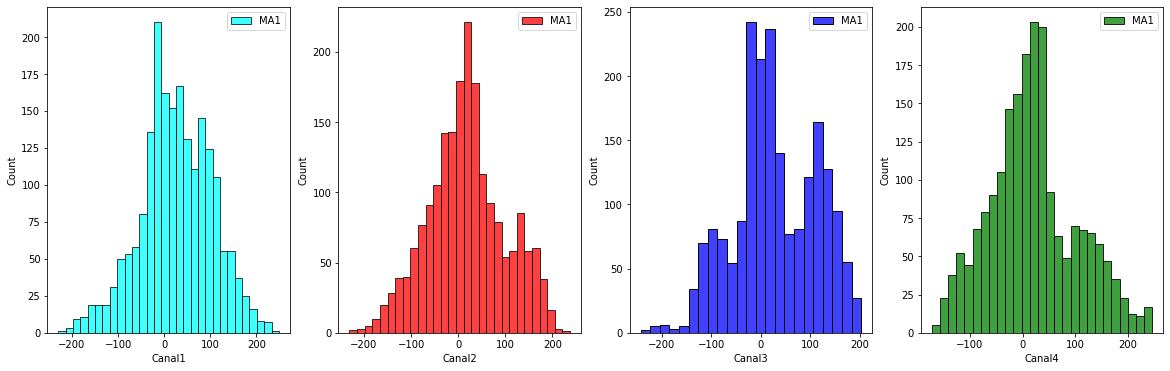

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(20,6))
g= seaborn.histplot(data= df[(df['Fuente'] == 'MA1')].sample(2000), x= df['Canal1'].sample(2000), label='MA1', ax=axes[0], color= 'cyan')
g= seaborn.histplot(data= df[(df['Fuente'] == 'MA1')].sample(2000), x= df['Canal2'].sample(2000), label='MA1', ax=axes[1], color= 'red')
g= seaborn.histplot(data= df[(df['Fuente'] == 'MA1')].sample(2000), x= df['Canal3'].sample(2000), label='MA1', ax=axes[2], color= 'blue')
g= seaborn.histplot(data= df[(df['Fuente'] == 'MA1')].sample(2000), x= df['Canal4'].sample(2000), label='MA1', ax=axes[3], color= 'green')

for ax in axes:
  ax.legend()
plt.show()

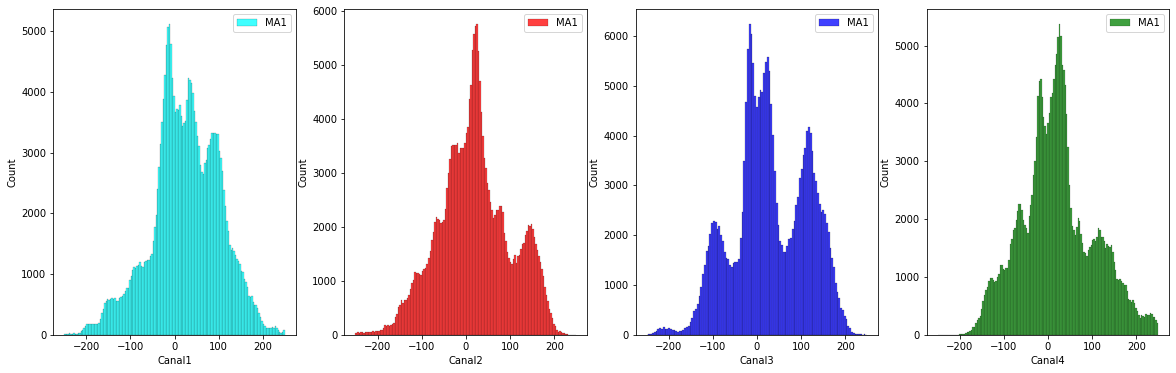

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(20,6))
g= seaborn.histplot(data= df[(df['Fuente'] == 'MA1')], x= df['Canal1'], label='MA1', ax=axes[0], color= 'cyan')
g= seaborn.histplot(data= df[(df['Fuente'] == 'MA1')], x= df['Canal2'], label='MA1', ax=axes[1], color= 'red')
g= seaborn.histplot(data= df[(df['Fuente'] == 'MA1')], x= df['Canal3'], label='MA1', ax=axes[2], color= 'blue')
g= seaborn.histplot(data= df[(df['Fuente'] == 'MA1')], x= df['Canal4'], label='MA1', ax=axes[3], color= 'green')

for ax in axes:
  ax.legend()
plt.show()

En este caso se graficaron todos los canales del sujeto MA1, en primer lugar muestreando 2000 valores, y en segundo lugar teniendo en cuenta todos los valores.

##Un mismo canal todos los sujetos

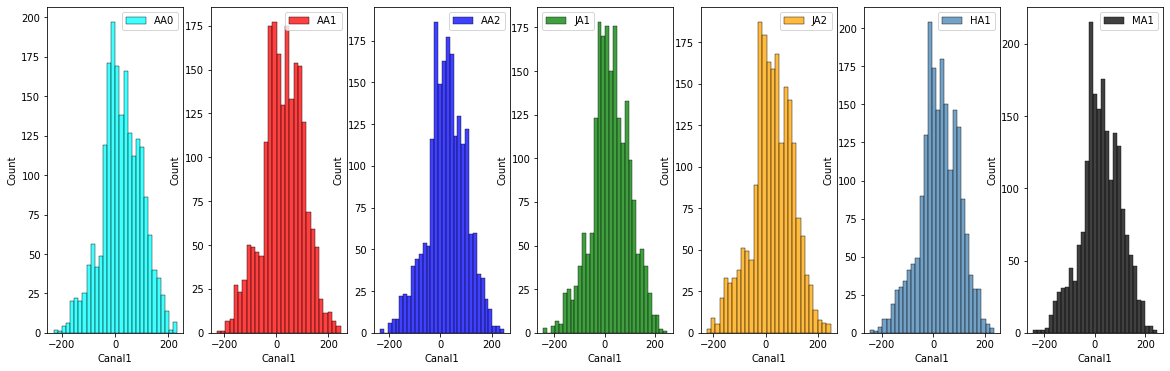

In [ ]:
fig, axes = plt.subplots(ncols=7, figsize=(20,6))
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA0')].sample(2000), x= df['Canal1'].sample(2000), label='AA0', ax=axes[0], color= 'cyan')
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA1')].sample(2000), x= df['Canal1'].sample(2000), label='AA1', ax=axes[1], color= 'red')
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA2')].sample(2000), x= df['Canal1'].sample(2000), label='AA2', ax=axes[2], color= 'blue')
g= seaborn.histplot(data= df[(df['Fuente'] == 'JA1')].sample(2000), x= df['Canal1'].sample(2000), label='JA1', ax=axes[3], color= 'green')
g= seaborn.histplot(data= df[(df['Fuente'] == 'JA2')].sample(2000), x= df['Canal1'].sample(2000), label='JA2', ax=axes[4], color= 'orange')
g= seaborn.histplot(data= df[(df['Fuente'] == 'HA1')].sample(2000), x= df['Canal1'].sample(2000), label='HA1', ax=axes[5], color= 'steelblue')
g= seaborn.histplot(data= df[(df['Fuente'] == 'MA1')].sample(2000), x= df['Canal1'].sample(2000), label='MA1', ax=axes[6], color= 'black')

for ax in axes:
  ax.legend()
plt.show()

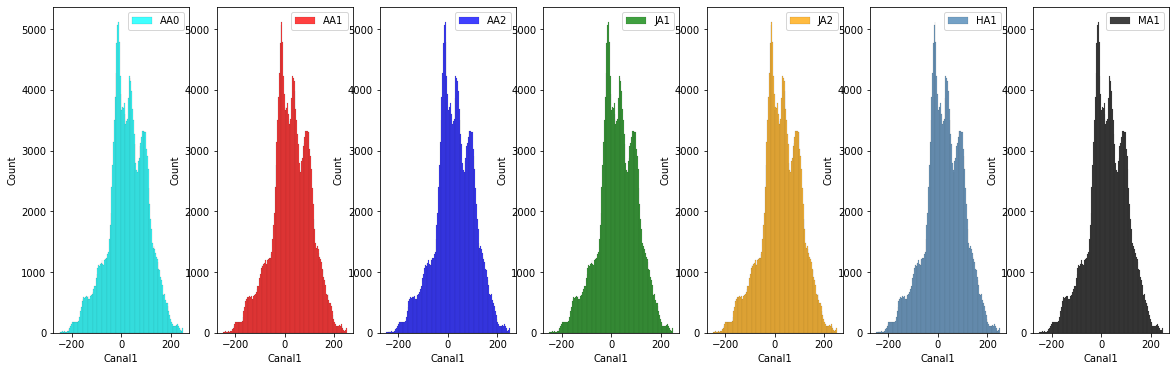

In [ ]:
fig, axes = plt.subplots(ncols=7, figsize=(20,6))
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA0')], x= df['Canal1'], label='AA0', ax=axes[0], color= 'cyan')
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA1')], x= df['Canal1'], label='AA1', ax=axes[1], color= 'red')
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA2')], x= df['Canal1'], label='AA2', ax=axes[2], color= 'blue')
g= seaborn.histplot(data= df[(df['Fuente'] == 'JA1')], x= df['Canal1'], label='JA1', ax=axes[3], color= 'green')
g= seaborn.histplot(data= df[(df['Fuente'] == 'JA2')], x= df['Canal1'], label='JA2', ax=axes[4], color= 'orange')
g= seaborn.histplot(data= df[(df['Fuente'] == 'HA1')], x= df['Canal1'], label='HA1', ax=axes[5], color= 'steelblue')
g= seaborn.histplot(data= df[(df['Fuente'] == 'MA1')], x= df['Canal1'], label='MA1', ax=axes[6], color= 'black')

for ax in axes:
  ax.legend()
plt.show()

En este caso se graficó el canal 1 correspondiente a todos los sujetos, en primer lugar muestreando 2000 valores, y en segundo lugar teniendo en cuenta todos los valores.

##Mismo canal, mismo sujeto, diferentes sesiones

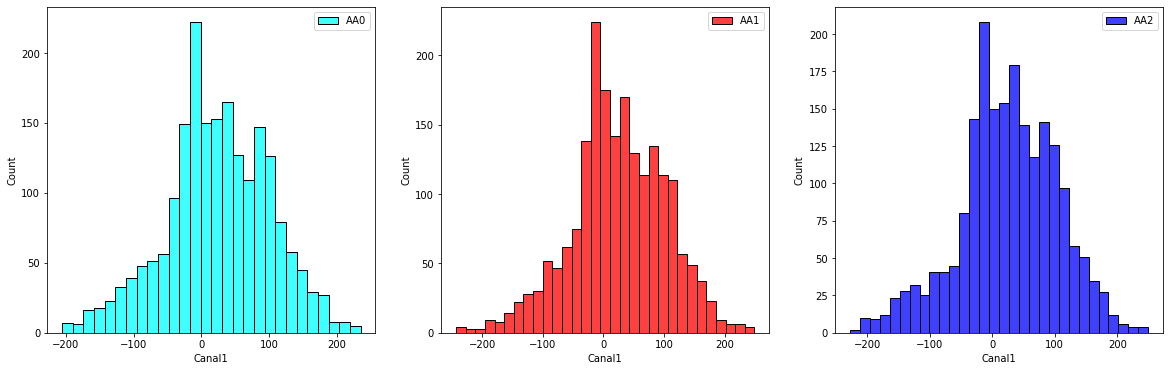

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(20,6))
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA0')].sample(2000), x= df['Canal1'].sample(2000), label='AA0', ax=axes[0], color= 'cyan')
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA1')].sample(2000), x= df['Canal1'].sample(2000), label='AA1', ax=axes[1], color= 'red')
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA2')].sample(2000), x= df['Canal1'].sample(2000), label='AA2', ax=axes[2], color= 'blue')

for ax in axes:
  ax.legend()
plt.show()

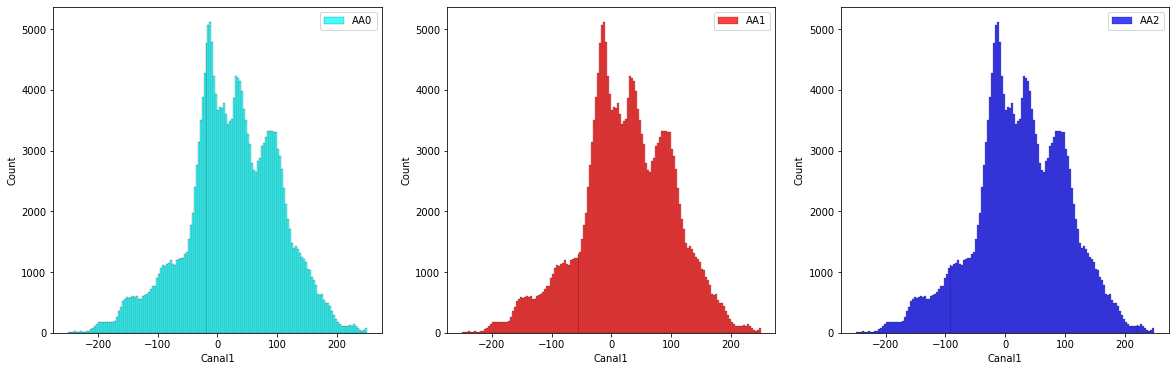

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(20,6))
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA0')], x= df['Canal1'], label='AA0', ax=axes[0], color= 'cyan')
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA1')], x= df['Canal1'], label='AA1', ax=axes[1], color= 'red')
g= seaborn.histplot(data= df[(df['Fuente'] == 'AA2')], x= df['Canal1'], label='AA2', ax=axes[2], color= 'blue')

for ax in axes:
  ax.legend()
plt.show()

En este caso se graficó el canal 1 correspondiente a todas las sesiones del sujeto AA, en primer lugar muestreando 2000 valores, y en segundo lugar teniendo en cuenta todos los valores.

##Mismo Sujeto y canal - Diferentes estados

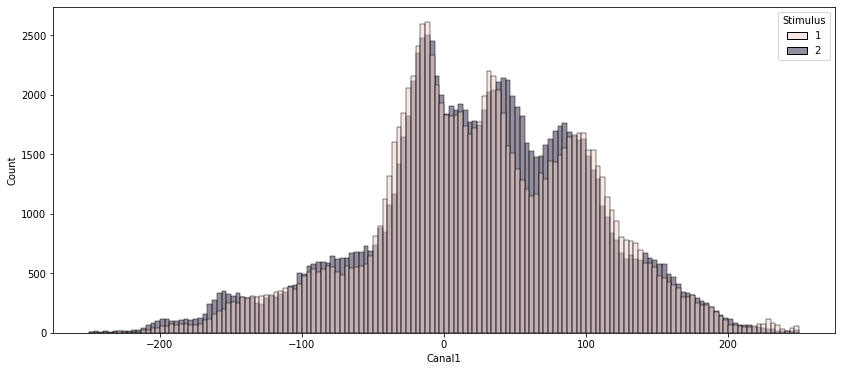

In [ ]:
fig= plt.figure(figsize=(14,6))
seaborn.histplot(data= df[(df['Fuente'] == 'MA1')], x= df['Canal1'], label='MA1', hue=df['Stimulus'])

En este caso se graficó el canal 1 correspondiente al sujeto MA1, diferenciando los estados.

##Mismo estado - Diferentes Suejtos

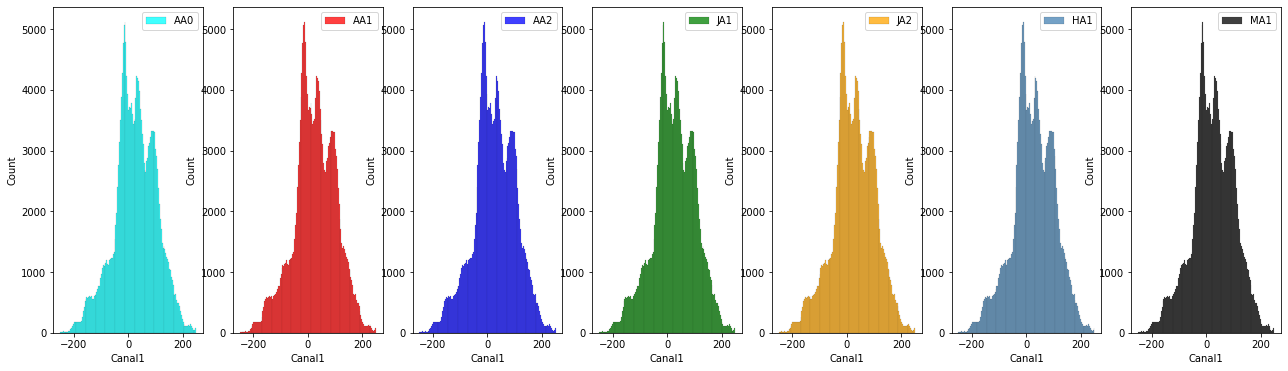

In [ ]:
fig, axes = plt.subplots(ncols=7, figsize=(22,6))
g= seaborn.histplot(data= df[(df['Stimulus'] == 1)], x= df['Canal1'], label='AA0', ax=axes[0], color= 'cyan')
g= seaborn.histplot(data= df[(df['Stimulus'] == 1)], x= df['Canal1'], label='AA1', ax=axes[1], color= 'red')
g= seaborn.histplot(data= df[(df['Stimulus'] == 1)], x= df['Canal1'], label='AA2', ax=axes[2], color= 'blue')
g= seaborn.histplot(data= df[(df['Stimulus'] == 1)], x= df['Canal1'], label='JA1', ax=axes[3], color= 'green')
g= seaborn.histplot(data= df[(df['Stimulus'] == 1)], x= df['Canal1'], label='JA2', ax=axes[4], color= 'orange')
g= seaborn.histplot(data= df[(df['Stimulus'] == 1)], x= df['Canal1'], label='HA1', ax=axes[5], color= 'steelblue')
g= seaborn.histplot(data= df[(df['Stimulus'] == 1)], x= df['Canal1'], label='MA1', ax=axes[6], color= 'black')

for ax in axes:
  ax.legend()
plt.show()

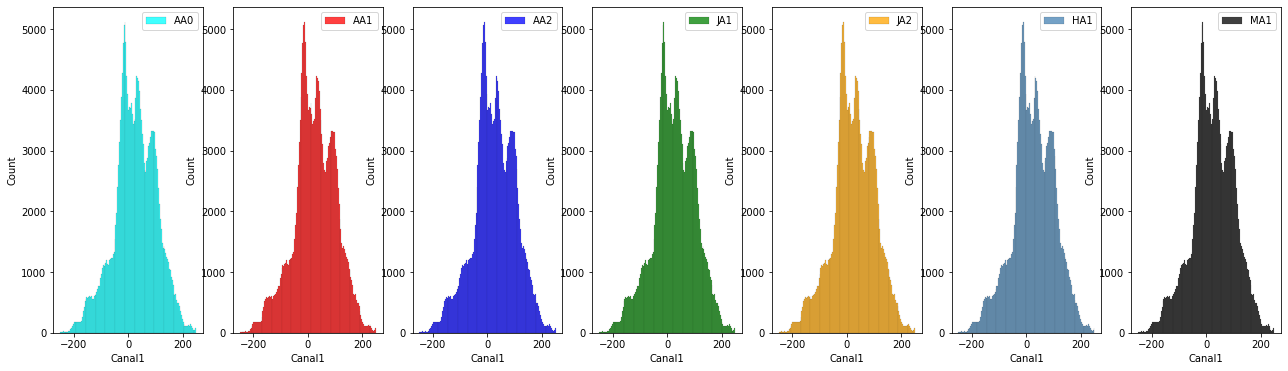

In [ ]:
fig, axes = plt.subplots(ncols=7, figsize=(22,6))
g= seaborn.histplot(data= df[(df['Stimulus'] == 2)], x= df['Canal1'], label='AA0', ax=axes[0], color= 'cyan')
g= seaborn.histplot(data= df[(df['Stimulus'] == 2)], x= df['Canal1'], label='AA1', ax=axes[1], color= 'red')
g= seaborn.histplot(data= df[(df['Stimulus'] == 2)], x= df['Canal1'], label='AA2', ax=axes[2], color= 'blue')
g= seaborn.histplot(data= df[(df['Stimulus'] == 2)], x= df['Canal1'], label='JA1', ax=axes[3], color= 'green')
g= seaborn.histplot(data= df[(df['Stimulus'] == 2)], x= df['Canal1'], label='JA2', ax=axes[4], color= 'orange')
g= seaborn.histplot(data= df[(df['Stimulus'] == 2)], x= df['Canal1'], label='HA1', ax=axes[5], color= 'steelblue')
g= seaborn.histplot(data= df[(df['Stimulus'] == 2)], x= df['Canal1'], label='MA1', ax=axes[6], color= 'black')

for ax in axes:
  ax.legend()
plt.show()

En este caso se graficó el canal 1 correspondiente a todos los sujetos, en primer lugar teniendo en cuenta solo el estimulo 1, y en segundo lugar teniendo en cuenta solo el estimulo 2.

##ANALISIS DEL PACIENTE MA1

In [ ]:
data= df[df['Fuente'] == 'MA1']

In [ ]:
data1= data[['Canal1', 'Stimulus', 'STime']]

In [ ]:
data1

,Canal1,Stimulus,STime
201142,-23.075006,1,01:20.875000
201143,-26.575006,1,01:20.880000
201144,-24.125006,1,01:20.885000
201145,-17.495006,1,01:20.890000
201146,-24.245006,1,01:20.895000
...,...,...,...
226394,48.574994,2,05:36.670000
226395,53.034994,2,05:36.675000
226396,50.024994,2,05:36.680000
226397,43.384994,2,05:36.685000


In [ ]:
data1_fS1= data1[(data1['Stimulus'] == 1)].sample(2000)
data1_fS2= data1[(data1['Stimulus'] == 2)].sample(2000)

Se filtraron, para tener en cuenta el analisis, una muestra de 2000 datos para cada estimulo, lo que equivaldria a 10 segundos, correspondiantes al canal 1 del paciente MA1.

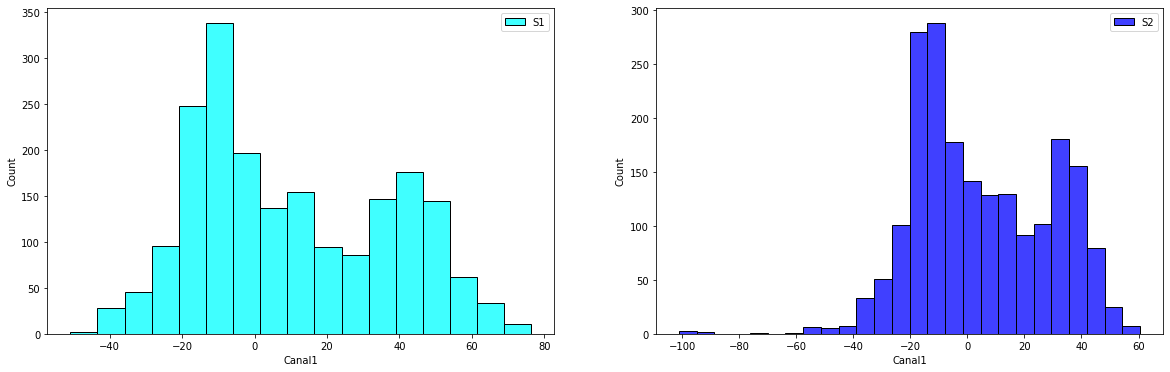

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))
g= seaborn.histplot(data = data1_fS2, x =data1_fS2['Canal1'], label='S1', ax=axes[0], color= 'cyan')
g= seaborn.histplot(data = data1_fS1, x =data1_fS1['Canal1'], label='S2', ax=axes[1], color= 'blue')

for ax in axes:
  ax.legend()
plt.show()

In [ ]:
stats.normaltest(data1_fS1['Canal1'])

NormaltestResult(statistic=6.843242641619148, pvalue=0.03265944055957522)

En este caso, se tuvo en cuenta una muestra de 2000 datos en los que el paciente estaba captando el estimulo 1, correspondientes al canal 1, aunque graficamente, los datos parecerian distribuirse como una normal, se puede observar que al realizar el test de hipotesis de normalidad, existen evidencias estadisticamente significativas para rechazar la hipótesis de que los datos se distribuyen de forma normal. Por lo que podria tratarse de una distribucion bimodal.

In [ ]:
stats.normaltest(data1_fS2['Canal1'])

NormaltestResult(statistic=566.4070274901298, pvalue=1.0145576383435788e-123)

En este caso, se tuvo en cuenta una muestra de 2000 datos en los que el paciente estaba captando el estimulo 2, correspondientes al canal 1, aunque graficamente, los datos parecerian distribuirse como una normal, al igual que en el caso anterior, se puede observar que al realizar el test de hipotesis de normalidad, existen evidencias estadisticamente significativas para rechazar la hipótesis de que los datos se distribuyen de forma normal. Por lo que también podría tratarse de una distribución bimodal.

In [ ]:
data1_fS1['Canal1'].describe()

count    2000.000000
mean        4.660959
std        23.765252
min      -101.105006
25%       -13.945006
50%         0.044994
75%        26.362494
max        60.574994
Name: Canal1, dtype: float64

In [ ]:
data1_fS2['Canal1'].describe()

count    2000.000000
mean       10.290464
std        26.913795
min       -50.905006
25%       -11.890006
50%         4.904994
75%        35.589994
max        76.424994
Name: Canal1, dtype: float64

In [ ]:
[data1_fS1['Canal1'].mean(), data1_fS1['Canal1'].median()]

[4.660959405395678, 0.04499440539569832]

In [ ]:
[data1_fS2['Canal1'].mean(), data1_fS2['Canal1'].median()]


[10.290464405395669, 4.904994405395655]

In [ ]:
data1_fS1['Canal1'].std()

23.765252468282693

In [ ]:
data1_fS2['Canal1'].std()

26.913795430435616

In [ ]:
stats.ttest_ind(data1_fS1.mean(), data1_fS2.mean(), equal_var=True)

Ttest_indResult(statistic=-0.7315070146079432, pvalue=0.5405685383002342)

Lo que se puede observar a partir del test de hipotesis realizado es que no existen evidencias estadisticamente significativas para rechazar la hipotesis de que existe una diferencia entre los estimadores de posición central de ambos estados.



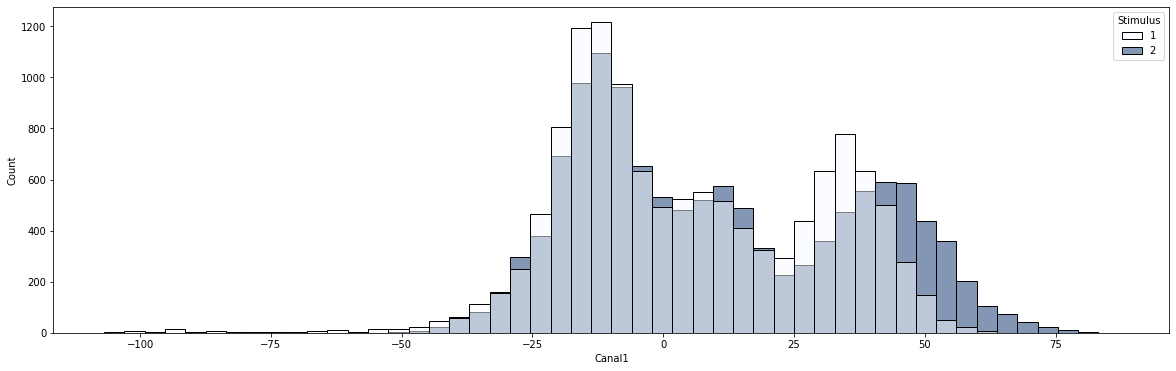

In [ ]:
plt.subplots(figsize=(20,6))
seaborn.histplot(data = data1, x =data1['Canal1'], bins = 50, hue= data1['Stimulus'], palette= 'Blues')
plt.show()

In [ ]:
stats.normaltest(data1['Canal1'])

NormaltestResult(statistic=997.9651282420559, pvalue=1.9707241394404536e-217)

Según lo manifestado en el test de normalidad se muestra evidencias estadisticamente significativas para rechazar la hipótesis de que los datos se distribuyen de forma normal, por lo que en este caso tambien podria tratarse de una distribucion bimodal.

In [ ]:
MeanS1= data1[(data1['Stimulus'] == 1)].mean()
MeanS2= data1[(data1['Stimulus'] == 2)].mean()

In [ ]:
stats.ttest_ind(MeanS1, MeanS2, equal_var=True)

Ttest_indResult(statistic=-0.6976292070846736, pvalue=0.5576010013076603)

Según lo manifestado en el test de independencia se muestra evidencias estadisticamente significativas para no rechazar la hipótesis de que las señales captadas por los dos estados son independientes entre si. 

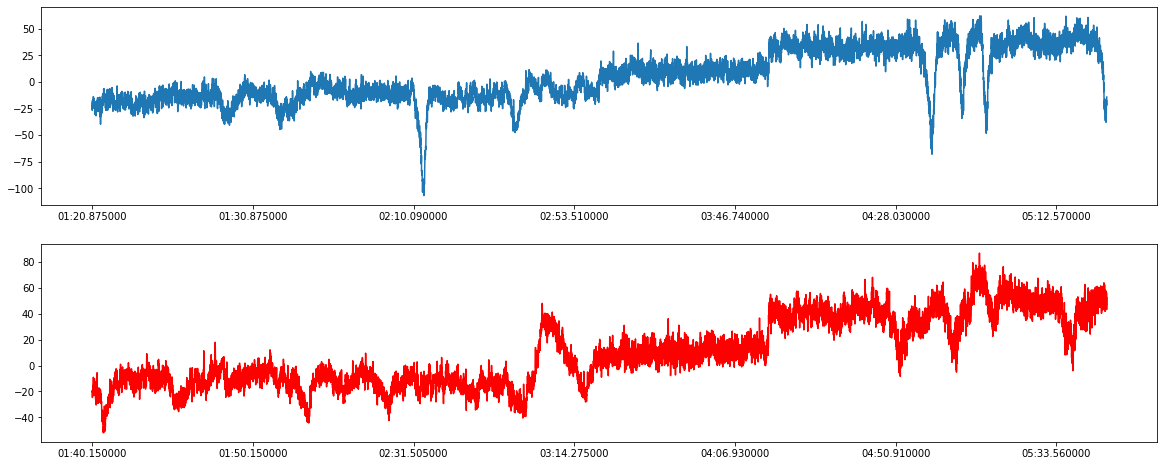

In [ ]:
nrows =2
fig, ax = plt.subplots(nrows, figsize=(20,8))

ax[0].plot(data1[(data1['Stimulus'] == 1)].STime, data1[(data1['Stimulus'] == 1)].Canal1)
ax[1].plot(data1[(data1['Stimulus'] == 2)].STime, data1[(data1['Stimulus'] == 2)].Canal1, color = 'red')
for i in range(nrows):
    ax[i].xaxis.set_major_locator(ticker.AutoLocator())
plt.show()


Como se puede observar en el gráfico en el que se representa cada uno de los estados correspondientes al canal 1 del paciente MA1, se puede observar que los voltajes varían a lo largo del tiempo, con una tendencia clara de aumento de la señal.

In [ ]:
T1= data.sample(2000)

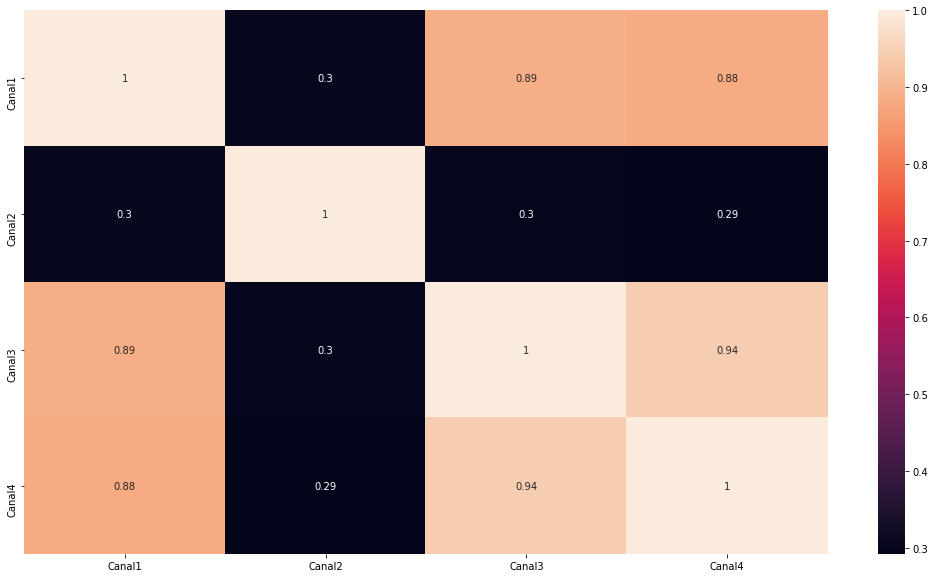

In [ ]:
fig= plt.figure(figsize=(18, 10))
df_small = data.iloc[:, 0:4]
correlation_mat = df_small.corr()
seaborn.heatmap(correlation_mat, annot = True)
plt.show()

Se puede observar que existe una baja correlación entre el canal 2 y los demás canales, pero entre el resto de los canales, 4, 1 y 3, pareceria haber cierta correlación, por lo que no sería necesario trabajar con los cuatro canales, ya que los canales 4,1 y 3 tendrían una correlación lo suficientemente alta como para considerar utilizar solo uno de ellos, junto con el canal 2.